### Task 6 - Bonus

Apply dimensionality reduction techniques such as Principal
Component Analysis (PCA)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [25]:
data = pd.read_csv('./datasets/smoking_drinking_dataset.csv')
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [26]:
# Encoding categorical variables
data['sex'] = data['sex'].replace({'Male': 1, 'Female': 0})
data['DRK_YN'] = data['DRK_YN'].replace({'Y': 1, 'N': 0})

# Separating features and target variable
features = data.drop(['DRK_YN'], axis=1)
target = data['DRK_YN']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=23, random_state=42)
features_pca = pca.fit_transform(features_scaled)

# Output the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Explained variance ratio for each component:", explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)




/var/folders/qp/_510d85j5x90h0mp91kyvxxh0000gn/T/ipykernel_67274/3392464091.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'Male': 1, 'Female': 0})
/var/folders/qp/_510d85j5x90h0mp91kyvxxh0000gn/T/ipykernel_67274/3392464091.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['DRK_YN'] = data['DRK_YN'].replace({'Y': 1, 'N': 0})


Explained variance ratio for each component: [0.19143919 0.10003082 0.08418365 0.0708521  0.06326275 0.05419785
 0.04861618 0.04622097 0.04242984 0.03968302 0.03605986 0.03349585
 0.03039395 0.03003835 0.02479592 0.0222191  0.02013305 0.01853039
 0.01440005 0.01036145 0.0093851  0.00659175 0.00267881]
Cumulative explained variance: [0.19143919 0.29147001 0.37565366 0.44650576 0.50976851 0.56396635
 0.61258253 0.6588035  0.70123334 0.74091636 0.77697622 0.81047207
 0.84086602 0.87090437 0.8957003  0.9179194  0.93805245 0.95658284
 0.97098289 0.98134434 0.99072944 0.99732119 1.        ]


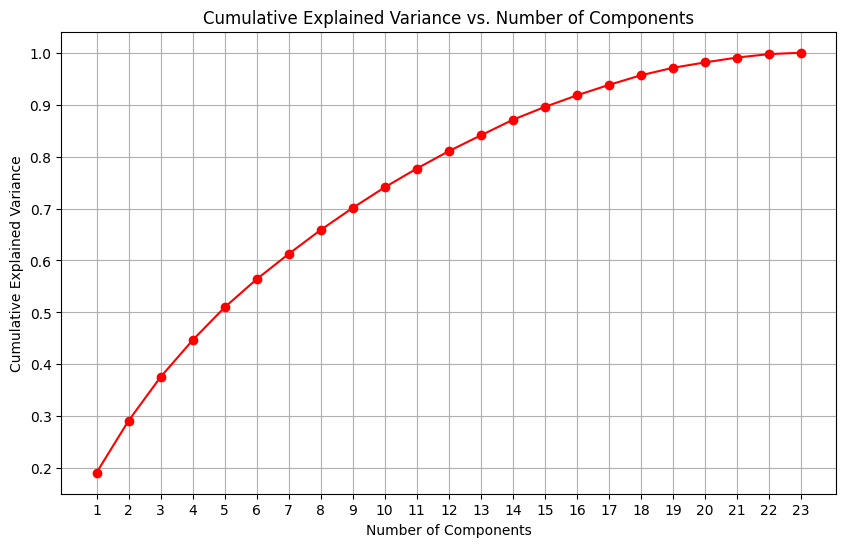

In [27]:
# Plotting the cumulative explained variance
n_components = np.arange(1, len(cumulative_explained_variance) + 1)
plt.figure(figsize=(10, 6))
plt.plot(n_components, cumulative_explained_variance, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.grid()
plt.xticks(n_components)  # Ensure all x-axis values are displayed
plt.show()

Correlation between waistline and weight: 0.6371731314336047


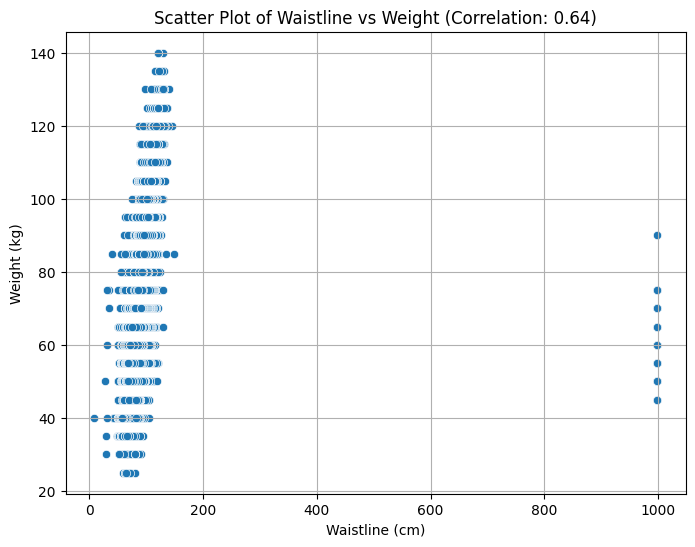

In [28]:
# Calculate the correlation coefficient between waistline and weight
correlation = data['waistline'].corr(data['weight'])
print("Correlation between waistline and weight:", correlation)

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='waistline', y='weight', data=data)
plt.xlabel("Waistline (cm)")
plt.ylabel("Weight (kg)")
plt.title(f"Scatter Plot of Waistline vs Weight (Correlation: {correlation:.2f})")
plt.grid(True)
plt.show()

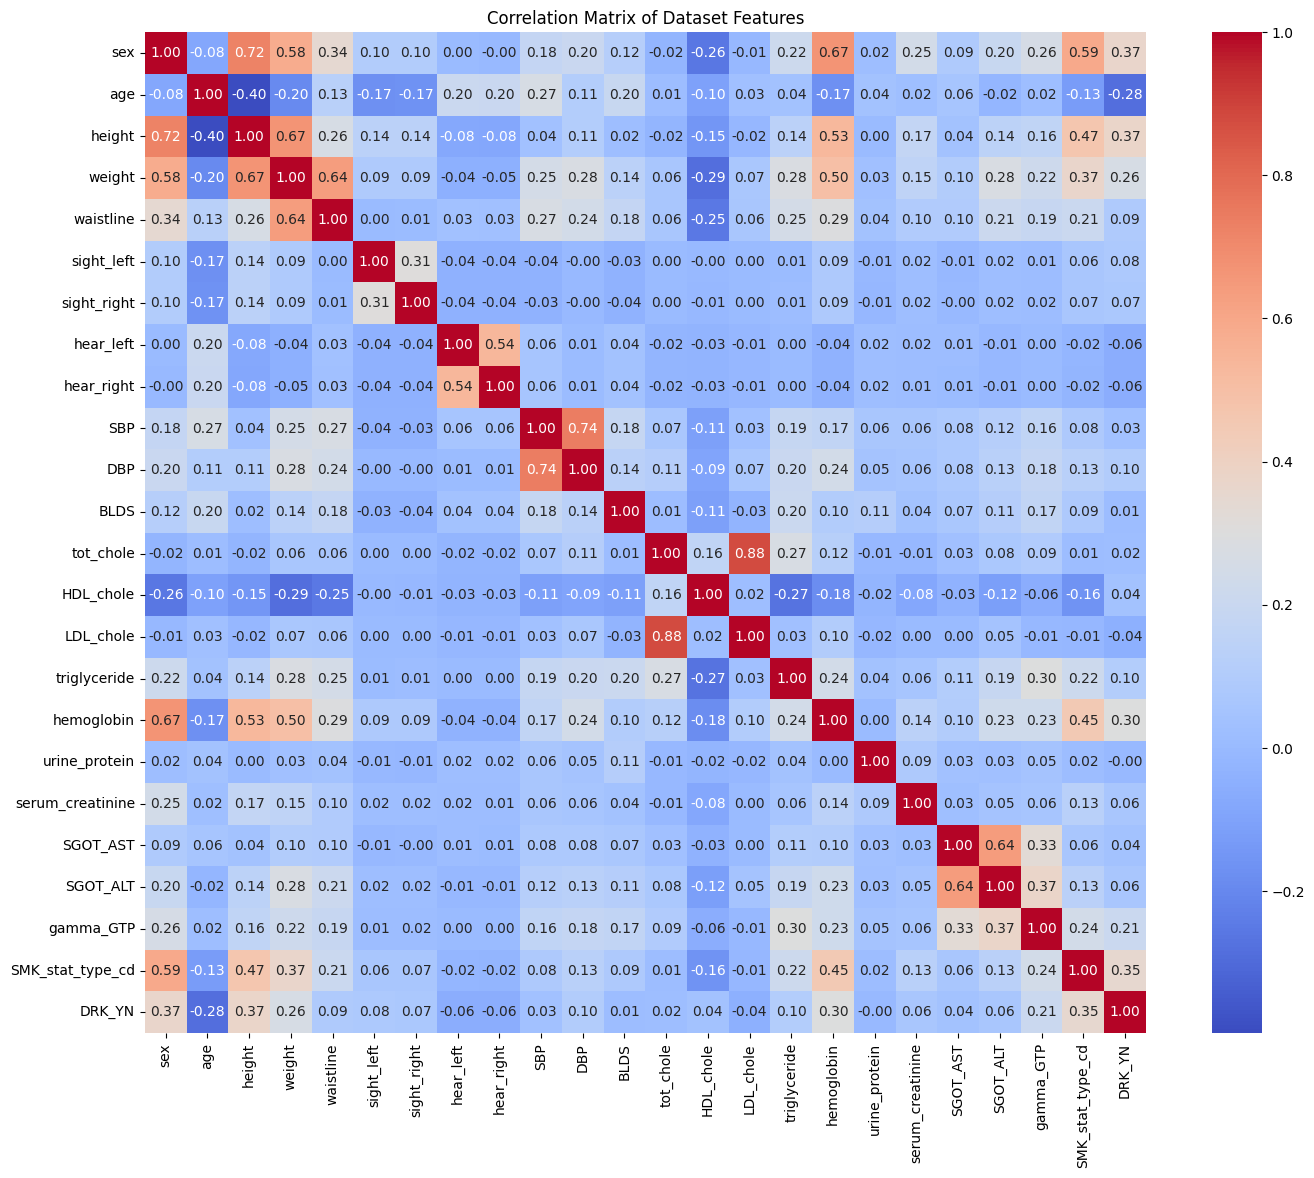

In [29]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(17, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Dataset Features")
plt.show()
